In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train.drop(columns=['Cabin'],inplace=True)

In [12]:
test.drop(columns=['Cabin'],inplace=True)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [15]:
# filling of missing values
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train['Embarked'].fillna('S',inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [17]:
test['Fare'].mean()

35.627188489208635

In [18]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [19]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [20]:
(177/891)*100

19.865319865319865

In [21]:
# filling missing value of age
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [22]:
# filling missing value of age
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [23]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\Sonu\AppData\Local\Temp\ipykernel_23856\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [24]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\Sonu\AppData\Local\Temp\ipykernel_23856\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [25]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [29]:
train.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   80     80     80      80    80   
       1                 136   136  136  136    136    136     136   136   
2      0                  97    97   97   97     97     97      97    97   
       1                  87    87   87   87     87     87      87    87   
3      0                 372   372  372  372    372    372     372   372   
       1                 119   119  119  119    119    119     119   119   

                 Embarked  
Pclass Survived            
1      0               80  
       1              136  
2      0               97  
       1               87  
3      0              372  
       1              119

In [30]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [31]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [32]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [33]:
train.groupby(['Fare'])['Survived'].mean()

Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64

C:\Users\Sonu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sonu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


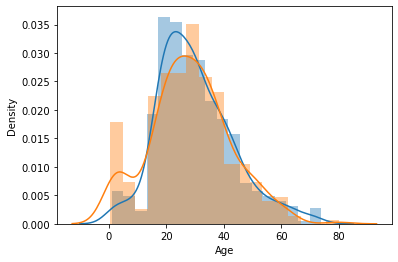

In [34]:
sns.distplot(train['Age'][train['Survived']==0]);
sns.distplot(train['Age'][train['Survived']==1]);


C:\Users\Sonu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sonu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


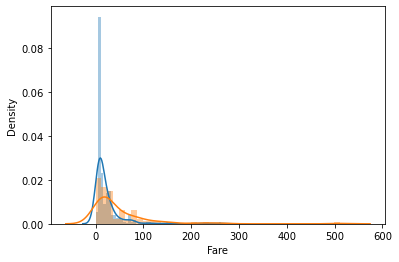

In [35]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1]);

In [36]:
train['family']=train['SibSp']+train['Parch']+1

In [37]:
test['family']=test['SibSp']+test['Parch']+1

In [38]:
test['family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: family, dtype: int64

In [39]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [40]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [41]:
def cal(number):
    if number==1:
        return 'alone'
    elif number>1 and number<5:
        return 'medium'
    else:
        return 'large'

In [42]:
train['family_size']=train['family'].apply(cal)

In [43]:
test['family_size']=test['family'].apply(cal)

In [44]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,medium


In [45]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [46]:
print(train.shape)
print(test.shape)

(891, 10)
(418, 9)


In [47]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [48]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [49]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [50]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [51]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,alone
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.0,23.4500,S,medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,alone


In [52]:
train.shape

(891, 9)

In [53]:
test.shape

(418, 8)

In [54]:
PassengerId=test['PassengerId'].values

In [55]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [56]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [57]:
train.shape

(891, 12)

In [58]:
train.drop(columns=['Name','PassengerId'],inplace=True)

In [59]:
test.drop(columns=['Name','PassengerId'],inplace=True)

In [60]:
train.shape

(891, 10)

In [61]:
test.shape

(418, 9)

In [62]:
train.head(2)

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_large,family_size_medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1


In [63]:
X=train.iloc[:,1:].values
Y=train.iloc[:,0].values

In [64]:
X

array([[22.    ,  7.25  ,  0.    , ...,  1.    ,  0.    ,  1.    ],
       [38.    , 71.2833,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [26.    ,  7.925 ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       ...,
       [20.    , 23.45  ,  0.    , ...,  1.    ,  0.    ,  1.    ],
       [26.    , 30.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [32.    ,  7.75  ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [65]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [67]:
from sklearn .tree import DecisionTreeClassifier


In [68]:
Classifier=DecisionTreeClassifier()

In [69]:
Classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [70]:
Y_pred=Classifier.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.7541899441340782

In [72]:
Xf=test.iloc[:,:].values

In [73]:
Y_final=Classifier.predict(Xf)

In [74]:
Y_final.shape

(418,)

In [75]:
PassengerId.shape

(418,)

In [76]:
final=pd.DataFrame()

In [77]:
final

""


In [78]:
final['PassengerId']=PassengerId
final['Survived']=Y_final

In [79]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [81]:
final.to_csv('submission.csv',index=False)